# K-Means Clustering: Implementation and Analysis

### Objectives:

In this notebook, we aim to:

- Implement the K-Means clustering algorithm from scratch to understand its inner workings.
- Compare our custom implementation of K-Means with the K-Means model build with scikit-learn.

Text(0, 0.5, 'x_2')

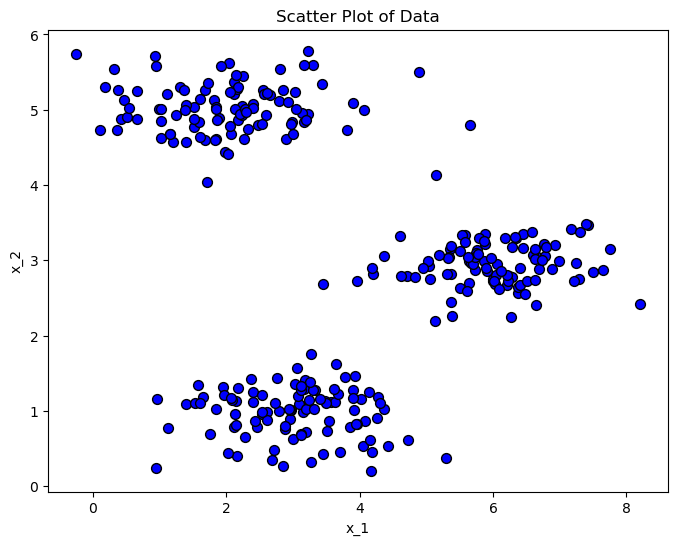

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# Load the dataset
X = np.load("X.npy")

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c="blue", marker="o", edgecolor="k", s=50)
plt.title("Scatter Plot of Data")
plt.xlabel("x_1")
plt.ylabel("x_2")

In [2]:
def kmeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids


def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Initialize an array to store the nearest centroid indices for each point
    idx = np.zeros(X.shape[0], dtype=int)

    # Compute Euclidean distances between each point and all centroids
    distances = np.sqrt(np.sum((np.expand_dims(X, axis=1) - centroids)**2, axis=2, keepdims=True))
    
    # Assign the index of the closest centroid to each point
    idx = np.argmin(distances, axis=1).flatten()

    return idx


def compute_centroids(X, idx, K, centroids):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids
        centroids (ndarray): (K, n) centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # For each centroid, find the points assigned to it
    for i in range(K):
        assigned_points = X[idx == i]

        # Update the centroid to be the mean of the assigned points if any
        if len(assigned_points) > 0:
            centroids[i] = np.mean(assigned_points, axis=0)

    return centroids


def kmeans_cost_function(X, idx, centroids):
    """
    Compute the K-means cost function (average within-cluster sum of squares)

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                        example in X. Concretely, idx[i] contains the index of
                        the centroid closest to example i
        centroids (ndarray): (K, n) centroids

    Returns:
        avg_wcss (float): The value of the K-means cost function (average WCSS)
    """

    # Calculate the squared distances from each point to its corresponding centroid
    squared_diffs = np.sum((X - centroids[idx])**2, axis=1)
    
    # Sum the squared differences and divide by the total number of points to get the average WCSS
    avg_wcss = np.mean(squared_diffs)

    return avg_wcss


def plot_progress_kmeans(X, centroids, previous_centroids, idx, i):
    """
    Plots the progress of the K-Means algorithm of each iteration

    Args:
        X (ndarray):   (m, n) Data points
        centroids (ndarray): (K, n) centroids
        previous_centroids (ndarray): (K, n) Centroids from the previous iteration
        idx (ndarray): (m,) Array containing index of closest centroid for each
                example in X. Concretely, idx[i] contains the index of
                the centroid closest to example i
        i (int): Current iteration number

    """

    # Define colormap and plot the examples   
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # Plot the data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors="none", edgecolors=c, linewidth=0.1, alpha=0.7)
    
    # Plot the centroids as black "x"s
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="k", linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        plt.plot([centroids[j, :][0], previous_centroids[j, :][0]],
                  [centroids[j, :][1], previous_centroids[j, :][1]], "-k", linewidth=1)
    
    plt.title("Iteration number %d" %(i+1))

In [3]:
def run_kmeans(X, K=0, max_iters=0, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize centroids
    centroids = kmeans_init_centroids(X, K)
    previous_centroids = np.copy(centroids)

    # Figure
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i+1, max_iters))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress and X.shape[1] == 2:
            plot_progress_kmeans(X, centroids, previous_centroids, idx, i)
            previous_centroids = np.copy(centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K, centroids)
        
        # Compute K-Means cost
        cost = kmeans_cost_function(X, idx, centroids)
        print("Cost:", cost)

    return centroids, idx

K-Means iteration 1/10
Cost: 4.467790104322127
K-Means iteration 2/10
Cost: 3.5714093185345237
K-Means iteration 3/10
Cost: 3.1755348203605833
K-Means iteration 4/10
Cost: 1.94530091384983
K-Means iteration 5/10
Cost: 0.8965765408358645
K-Means iteration 6/10
Cost: 0.8888617321830645
K-Means iteration 7/10
Cost: 0.8888617321830645
K-Means iteration 8/10
Cost: 0.8888617321830645
K-Means iteration 9/10
Cost: 0.8888617321830645
K-Means iteration 10/10
Cost: 0.8888617321830645


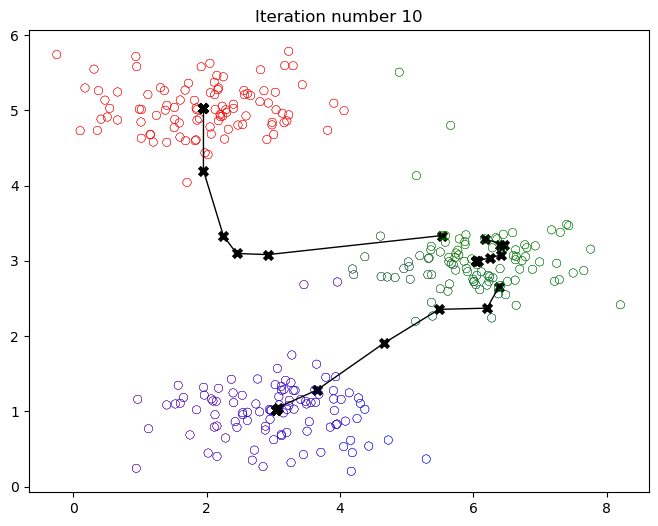

In [4]:
# Run the K-Means algorithm with 3 clusters and 10 iterations,
# Note: Different runs may produce different results due to random centroid initialization.
centroids, idx = run_kmeans(X, K=3, max_iters=10, plot_progress=True)

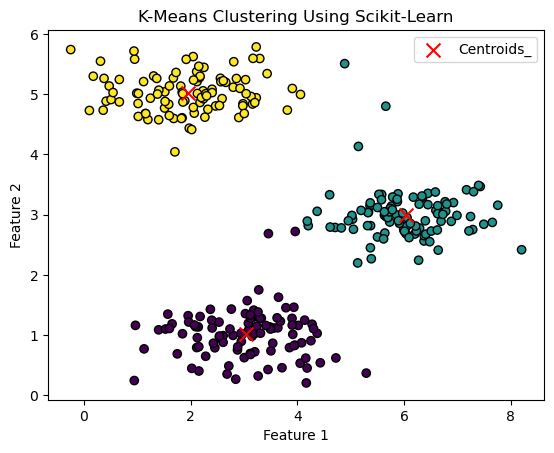

In [5]:
from sklearn.cluster import KMeans

# Create and train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the final centroids
centroids_ = kmeans.cluster_centers_

# Get the cluster assignments for each point
labels = kmeans.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", marker="o", edgecolor="k")
plt.scatter(centroids_[:, 0], centroids_[:, 1], c="red", marker="x", s=100, label="Centroids_")
plt.title("K-Means Clustering Using Scikit-Learn")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

In [6]:
# Print the centroids that we obtained manually
print("Our-Centroids:\n", centroids)

# Print the centroids that sklearn calculated
print("\nSklearn-Centroids:\n", centroids_)

Our-Centroids:
 [[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]

Sklearn-Centroids:
 [[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]]


After successfully implementing our custom K-Means algorithm and clustering the dataset into three clusters, we see that the scikit-learn results match ours, despite differences in cluster indexing, which is not an issue as long as the clusters themselves are consistent. To predict new data points manually, you can use the `find_closest_centroids` function, passing the data and centroids as arguments to find the nearest cluster. With that, the project of building the K-Means algorithm is complete!